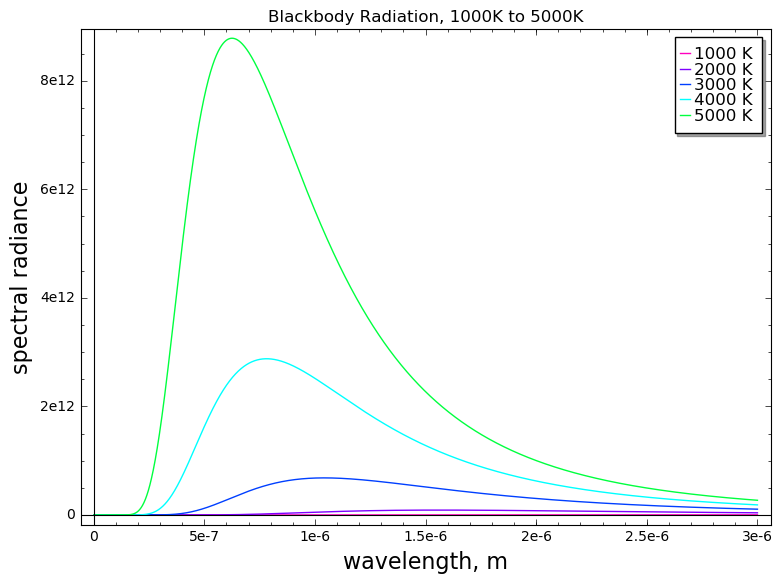

In [1]:
k = 1.281*(10^-23) # J/K, Boltzmann constant
h = 6.626*(10^-34) # J•s, Planck Constant
c = 3*10^8         # m/s, speed of light
var('T l'); B(T,l) = ((2*h*c**2)/(l**5))*1/(exp(h*c/(l*k*T))-1)
Temperatures = [1000,2000,3000,4000,5000]

col = rainbow(len(Temperatures)+3)
plotTitle = 'Blackbody Radiation, '+str(min(Temperatures))+'K to '+str(max(Temperatures))+'K'
g = plot([],title=plotTitle,frame=True,axes_labels=['wavelength, m','spectral radiance'])

for temps in Temperatures:
   legend = str(temps) + ' K'
   g += plot(B(T=temps),l,0,3*10**-6,color=col.pop(),legend_label=legend)
show(g)

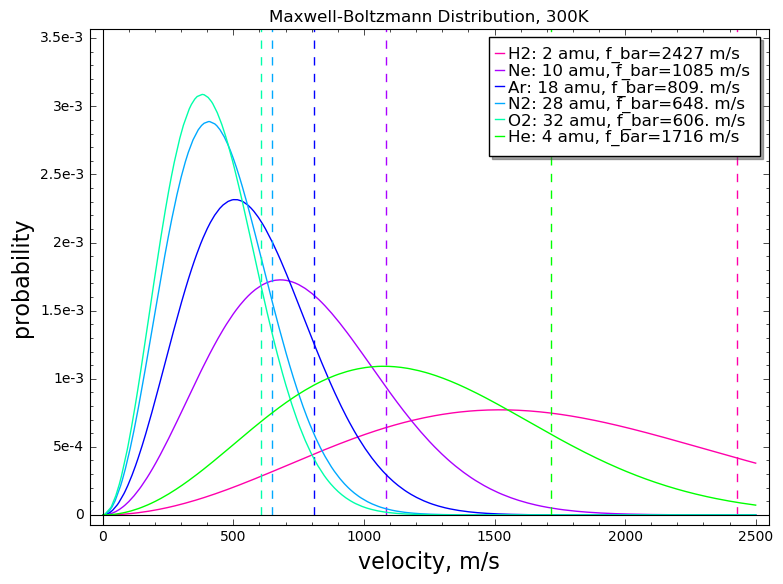

In [2]:
T = 300 # absolute temperature; 300K
masses = {'H2':2,'He':4,'Ne':10,'Ar':18,'N2':28,'O2':32} # name, mass (amu)
k = 1.281*(10^-23) # Boltzmann constant
a(m) = sqrt(k*T/m)
f(x,m) = sqrt(4/pi)*(x**2)*exp(-(x**2)/(2*a**2))/(a**3)
def f_bar(m): return numerical_integral(f(x,m)*x,0,+infinity)[0]
plotTitle = 'Maxwell-Boltzmann Distribution, '+str(T)+'K'

g = plot([],title=plotTitle,frame=True,axes_labels=['velocity, m/s','probability'])
c = rainbow(len(masses)+3)

for molecule in masses:
    mass = masses[molecule]
    mkg = mass*1.661*10^-27
    vavg = f_bar(m=mkg)
    linec = c.pop()
    legend = molecule+': '+str(mass)[0:4]+' amu, f_bar='+str(vavg)[0:4]+' m/s'
    g += plot(f(x,m=mkg),x,(0,2500),color=linec,legend_label=legend)
    g += line([(vavg,0), (vavg,1)],color=linec,linestyle='--')
g += plot([],ymax=0.0035)
show(g)

'Based on 1000 shots, pi is ~= 3.19600000000000'

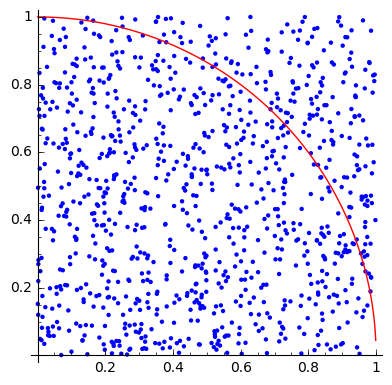

In [10]:
### This script estimates pi by shooting randomly at a circle inscribed in a square
var ('x y r n'); r = 1; inside = 0; points = []
n = 1000
## Try changing this! This is the number of shots 
## the estimate is based on
### Shoot randomly into the square:
for i in range(0,n):
    [x,y]=[random(),random()]
    points.append([x,y])

### If a shot lands inside the circle, make a note of it
    if (y <= sqrt((r^2)-(x^2))):
        inside += 1

### Approximate pi based on the fraction of shots that landed in the circle
### Area of circle = pi*r^2; Area of square = (2*r)^2 = 4*r^2
### Shots in circle / Shots in square = (pi*r^2)/(4*r^20 = pi()/4
piapprox = 4*(inside / n)
estimate = "Based on "
estimate += str(n)
estimate += " shots, pi is ~= "
estimate += str(piapprox.n())
show(estimate)

### Graph the solution
circle = []
for i in range(0,1000):
    x = i/1000
    y = sqrt((r^2)-(i/1000)^2)
    circle.append([x,y])

graph = list_plot(points)
graph += list_plot(circle,color='red',figsize=[5,4],plotjoined=true)
show(graph,aspect_ratio=1)